In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

In [2]:
df_calendar=pd.read_csv('calendar.csv')
df_reviews=pd.read_csv('reviews.csv')
df_listings=pd.read_csv('listings.csv')

In [4]:
data_rating=df_listings.groupby(['property_type']).mean()["review_scores_rating"].dropna()
data_rating.nlargest(data_rating.shape[0])

property_type
Entire Floor       100.000000
Guesthouse         100.000000
Villa               99.500000
Loft                96.312500
Townhouse           94.760870
Condominium         94.451977
House               92.204593
Bed & Breakfast     91.800000
Apartment           91.514141
Boat                91.454545
Other               88.111111
Dorm                86.500000
Name: review_scores_rating, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

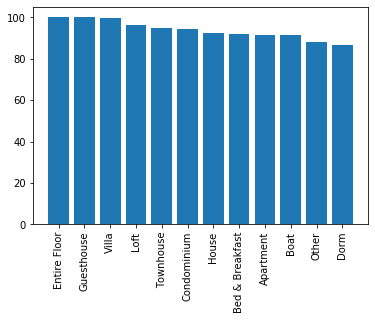

In [5]:
plt.bar(data_rating.nlargest(data_rating.shape[0]).index, data_rating.nlargest(data_rating.shape[0]))
plt.xticks(rotation=90)

In [6]:
data_count=df_listings.groupby(['property_type']).count()['price']
data_count.nlargest(data_count.shape[0])

property_type
Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: price, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

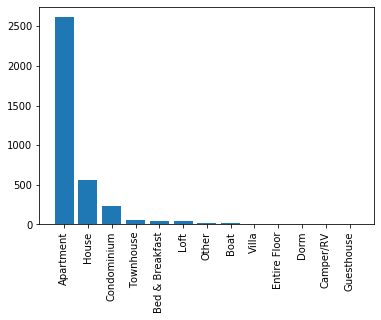

In [7]:
plt.bar(data_count.nlargest(data_count.shape[0]).index, data_count.nlargest(data_count.shape[0]))
plt.xticks(rotation=90)

In [8]:
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [9]:
df_listings.price = df_listings.price.apply(remove_sign,sign='$')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

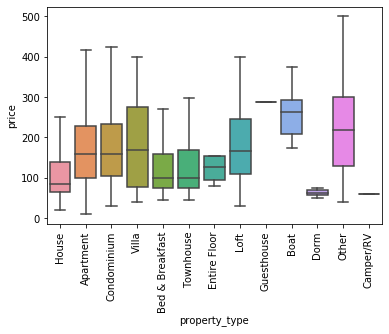

In [71]:
sb.boxplot(y='price', x='property_type',data=df_listings,)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

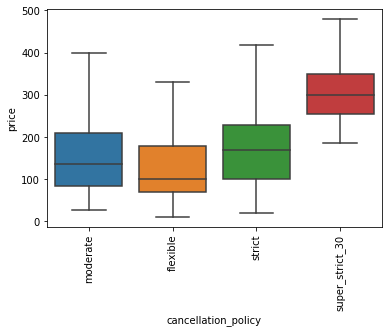

In [70]:
sb.boxplot(y='price', x='cancellation_policy',data=df_listings,showfliers=False)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

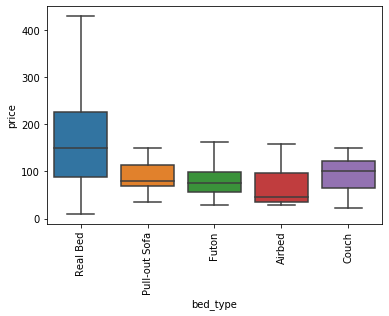

In [69]:
sb.boxplot(y='price', x='bed_type',data=df_listings,showfliers=False)
plt.xticks(rotation=90)

In [72]:
available_count = df_calendar.groupby(['date']).count()
avg_price = df_calendar.groupby('date').mean()

In [14]:
df_calendar.price = df_calendar.price.apply(remove_sign,sign='$')
# df_calendar['price']=df_calendar['price'].str.replace('$','')

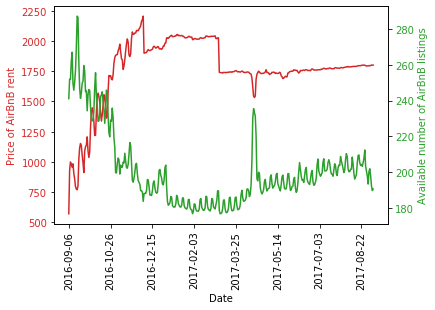

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price of AirBnB rent', color=color)
ax1.plot(available_count.index,available_count['price'],color=color)
ax1.tick_params(axis='y', labelcolor=color)
max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
ax1.xaxis.set_major_locator(xloc)
plt.xticks(rotation=90)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Available number of AirBnB listings', color=color) 
ax2.plot(avg_price.index,avg_price['price'],color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_locator(xloc)
plt.xticks(rotation=90)

plt.show()


In [28]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')

In [37]:
df_month=df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))['price'].sum().sort_values()
df_month

date
September     7916920.0
March        10032940.0
April        10135248.0
February     10280396.0
June         10363503.0
May          10382979.0
October      10817676.0
July         11129255.0
August       11297226.0
January      11549466.0
December     11748139.0
November     11949813.0
Name: price, dtype: float64

In [39]:
df_monthly_count=df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))['price'].count().sort_values()
df_monthly_count

date
September    33398
October      46345
April        51382
June         52731
May          53600
July         54963
March        55181
August       55561
February     56810
November     58888
December     60997
January      63181
Name: price, dtype: int64

In [53]:
df_monthly_price=df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))['price'].mean().sort_values()
df_monthly_price

date
February     180.961028
March        181.818742
January      182.799671
December     192.601915
May          193.712295
June         196.535302
April        197.252890
July         202.486309
November     202.924416
August       203.330142
October      233.416248
September    237.047727
Name: price, dtype: float64

([<matplotlib.axis.XTick at 0x1bf25a37ac8>,
 <a list of 12 Text xticklabel objects>)

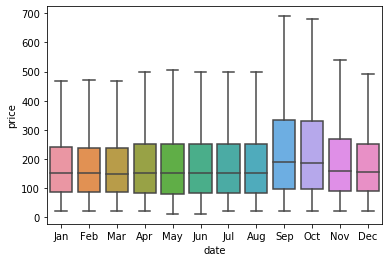

In [68]:
# df_calendar['month'] = df_calendar['date'].dt.strftime('%b')
sb.boxplot(x=df_calendar['date'].dt.month,y='price',data=df_calendar, showfliers=False)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
